### Color

### 범주형 색상

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
student = pd.read_csv('data/StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Group to Number
groups = sorted(student['race/ethnicity'].unique())
gton = dict(zip(groups , range(5)))

# Group에 따라 색 1, 2, 3, 4, 5
student['color'] = student['race/ethnicity'].map(gton)
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,color
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,2
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,4
996,male,group C,high school,free/reduced,none,62,55,55,2
997,female,group C,high school,free/reduced,completed,59,71,65,2
998,female,group D,some college,standard,completed,68,78,77,3


In [4]:
# color list to color map
print(plt.cm.get_cmap('tab10').colors)

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))


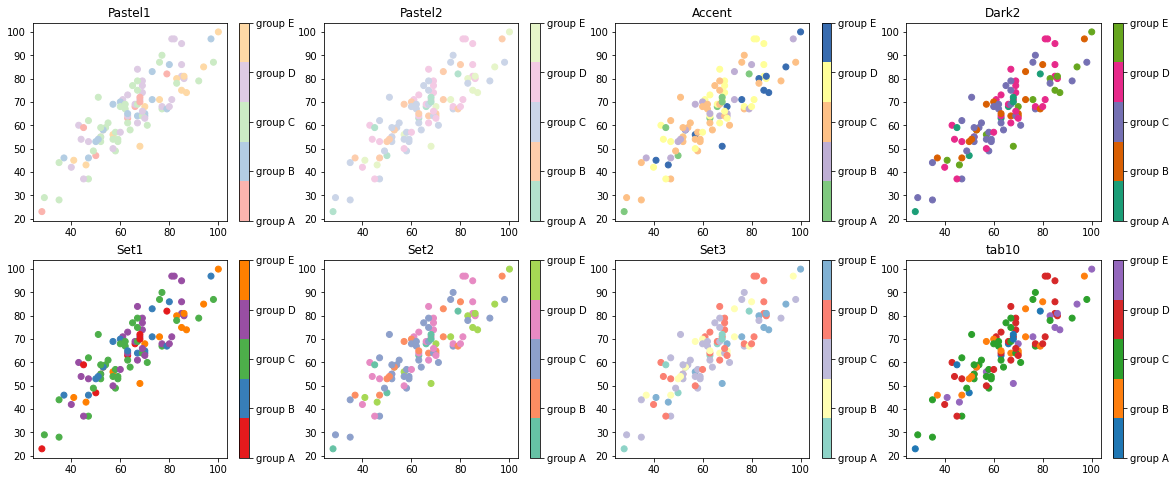

In [5]:
from matplotlib.colors import ListedColormap

qualitative_cm_list = ['Pastel1', 'Pastel2', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10']

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(qualitative_cm_list):    
    pcm = axes[idx].scatter(student_sub['math score'], student_sub['reading score'],
                     c=student_sub['color'], cmap=ListedColormap(plt.cm.get_cmap(cm).colors[:5]))
    cbar = fig.colorbar(pcm, ax=axes[idx], ticks=range(5))
    cbar.ax.set_yticklabels(groups)
    axes[idx].set_title(cm)
    
plt.show()

### 연속형 색상

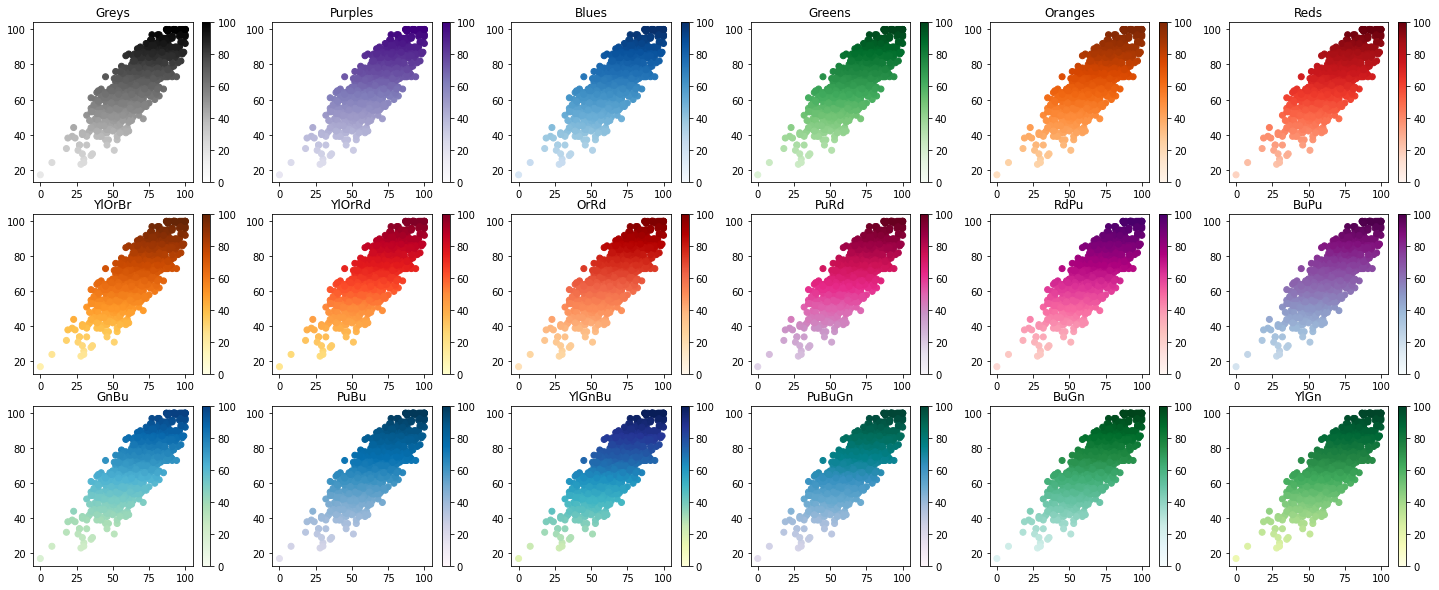

In [6]:
sequential_cm_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

fig, axes = plt.subplots(3, 6, figsize=(25, 10))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(sequential_cm_list):    
    pcm = axes[idx].scatter(student['math score'], student['reading score'],
                            c=student['reading score'], 
                            cmap=cm,
                            vmin=0, vmax=100
                    
                     )
    fig.colorbar(pcm, ax=axes[idx])
    axes[idx].set_title(cm)
    
plt.show()

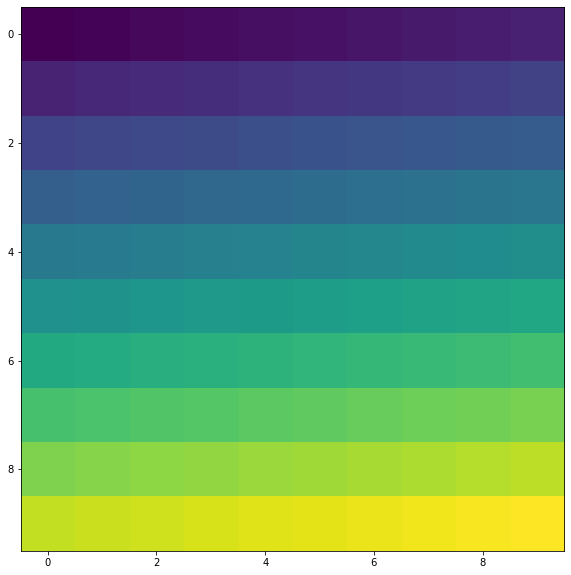

In [7]:
im = np.arange(100).reshape(10, 10)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im)
plt.show()

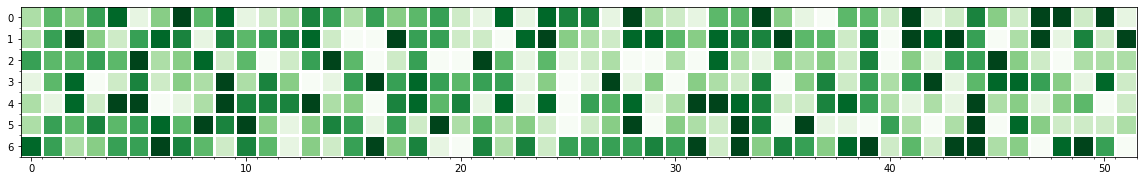

In [8]:
im =  np.random.randint(10, size=(7, 52))
fig, ax = plt.subplots(figsize=(20, 5))
ax.imshow(im, cmap='Greens')
ax.set_yticks(np.arange(7)+0.5, minor=True)
ax.set_xticks(np.arange(52)+0.5, minor=True)
ax.grid(which='minor', color="w", linestyle='-', linewidth=3)
plt.show()

### 발산형 색상

69.169
[0.         0.07228672 0.14457344 0.21686015 0.5134767  0.75673835
 1.        ]


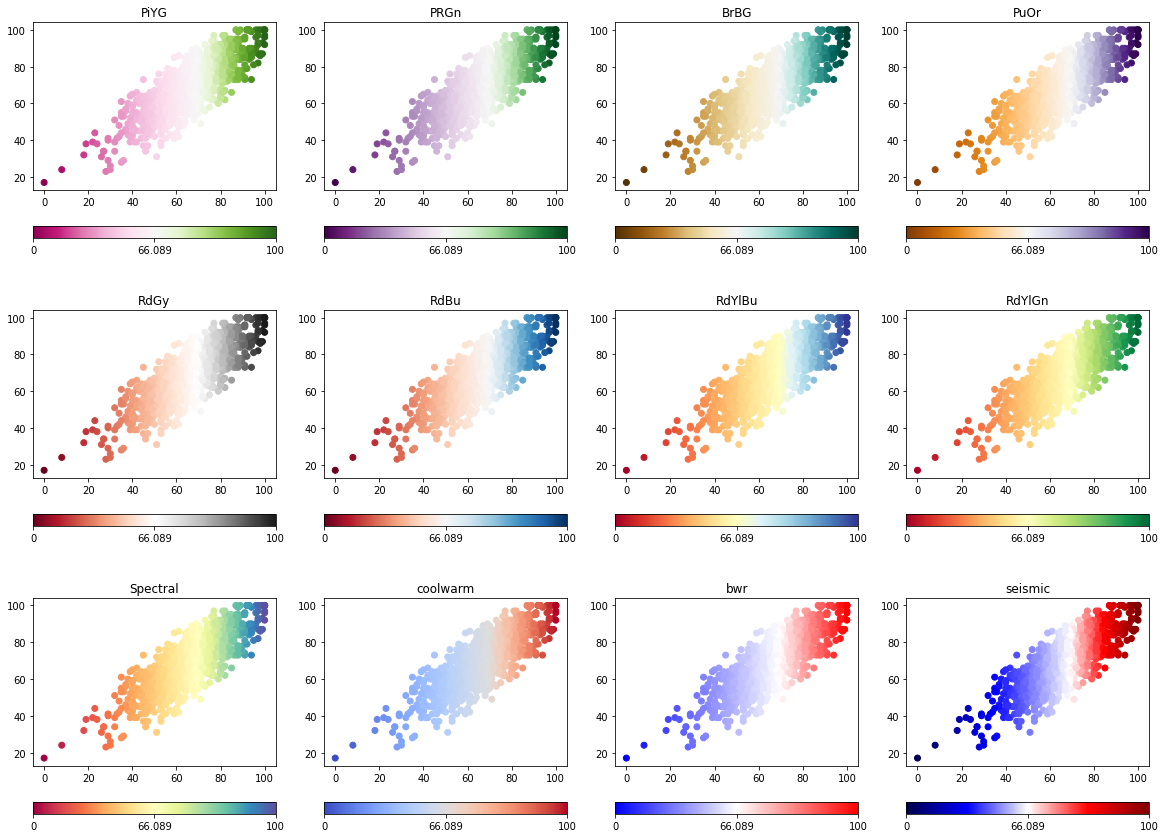

In [15]:
from matplotlib.colors import TwoSlopeNorm

diverging_cm_list = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

offset = TwoSlopeNorm(vmin=0, vcenter=student['reading score'].mean(), vmax=100)

print(student['reading score'].mean())
print(offset([0, 10, 20, 30, 70, 85, 100]))

student_sub = student.sample(100)

for idx, cm in enumerate(diverging_cm_list):    
    pcm = axes[idx].scatter(student['math score'], student['reading score'],
                            c=offset(student['math score']), 
                            cmap=cm,
                     )
    cbar = fig.colorbar(pcm, ax=axes[idx], 
                        ticks=[0, 0.5, 1], 
                        orientation='horizontal'
                       )
    cbar.ax.set_xticklabels([0, student['math score'].mean(), 100])
    axes[idx].set_title(cm)
    
plt.show()

### 강조 시각화

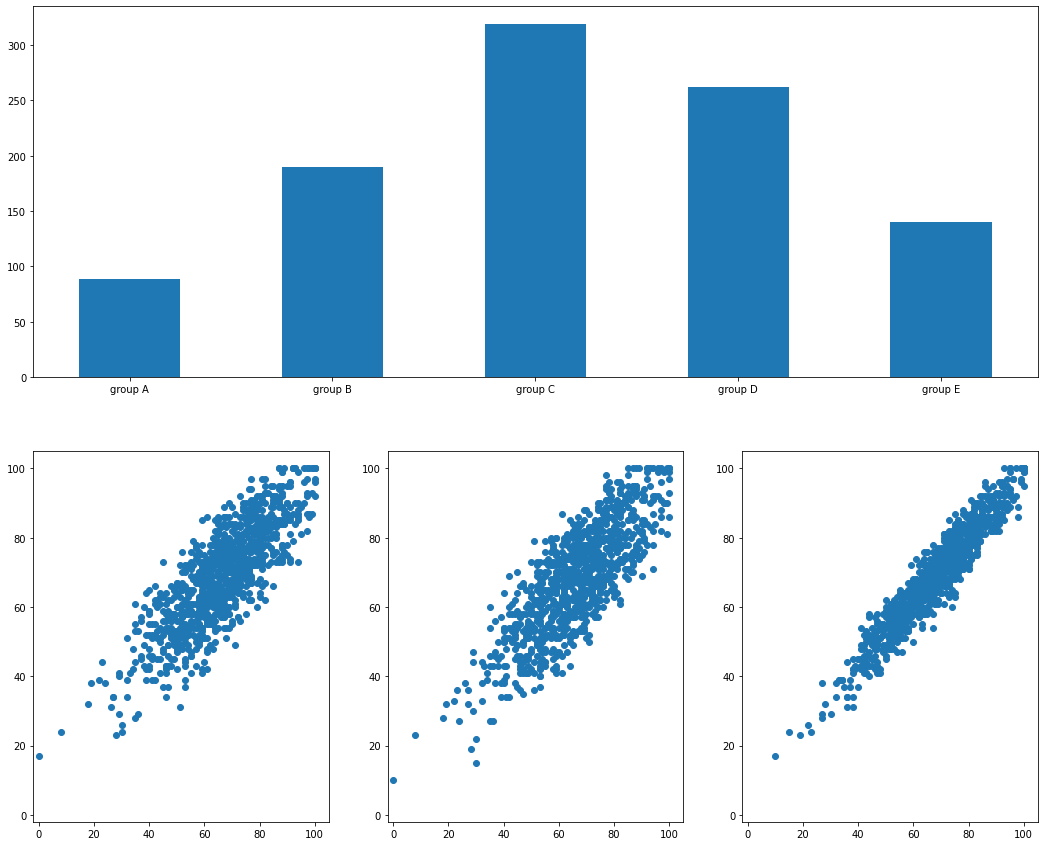

In [10]:
fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'])
ax_s2.scatter(student['math score'], student['writing score'])
ax_s3.scatter(student['writing score'], student['reading score'])

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

### 명도 대비

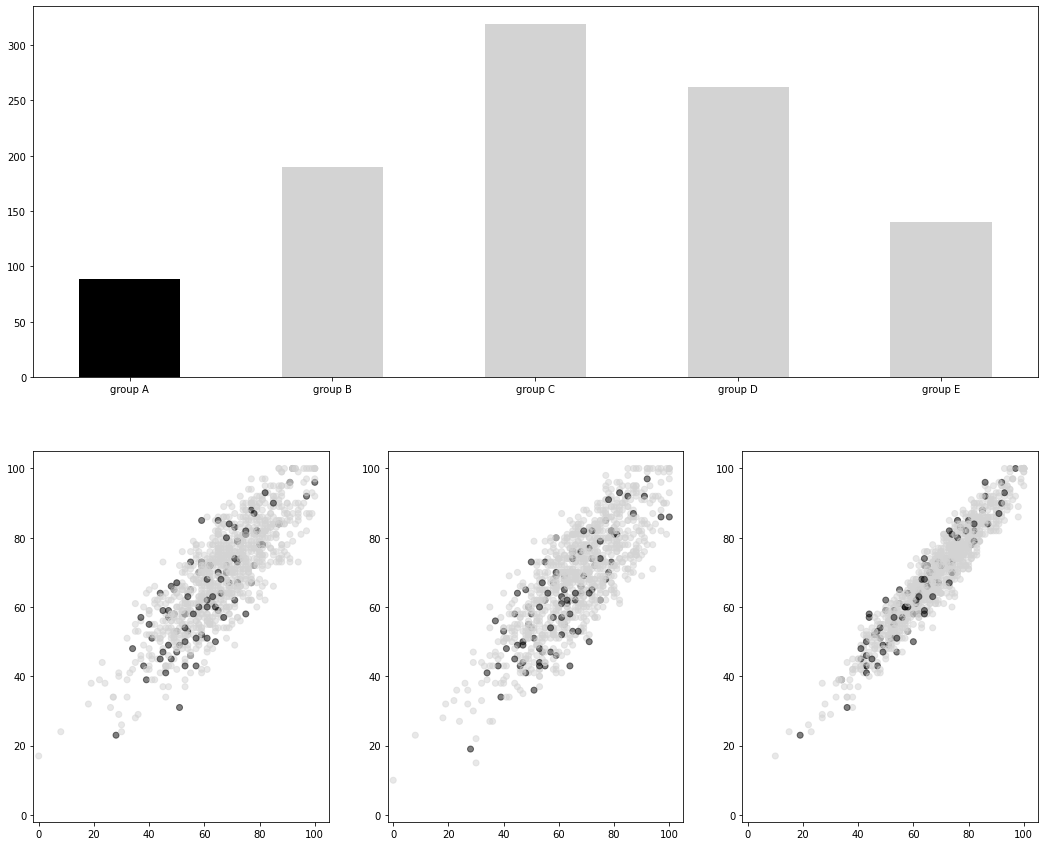

In [11]:
a_color, nota_color = 'black', 'lightgray'

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.5)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.5)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.5)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

### 채도 대비

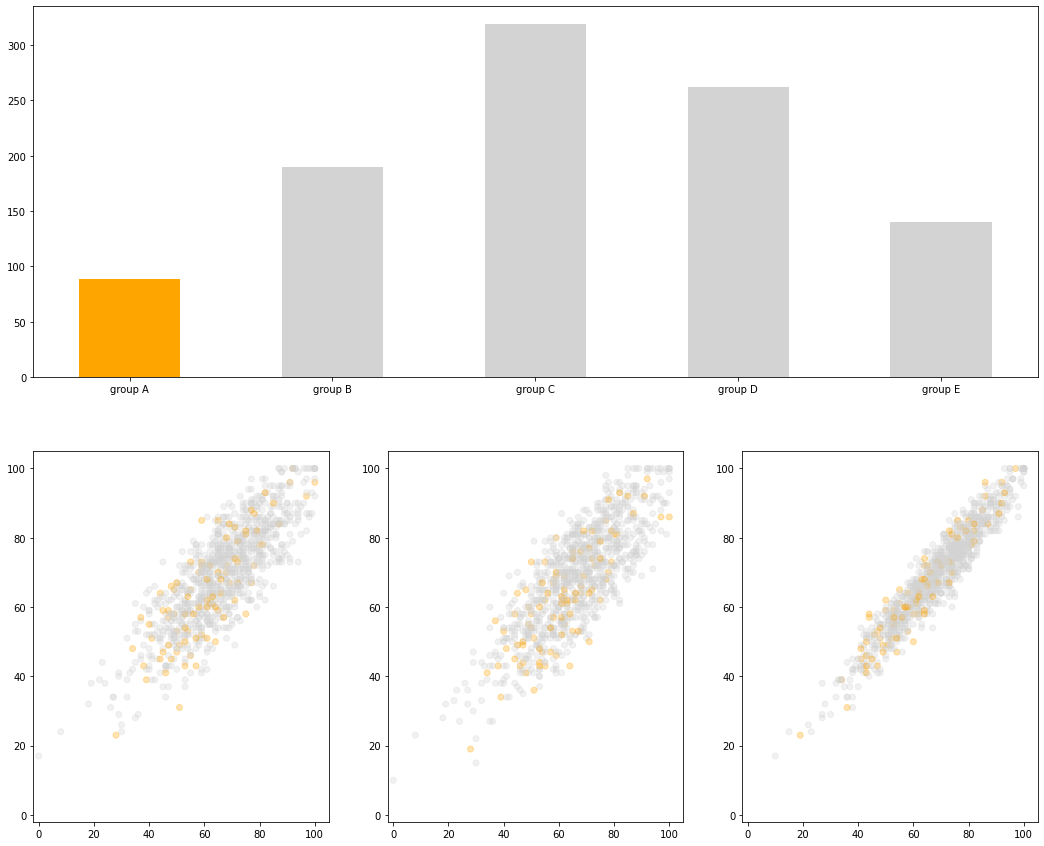

In [12]:
a_color, nota_color = 'orange', 'lightgray'

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.3)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.3)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.3)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()

### 보색 대비

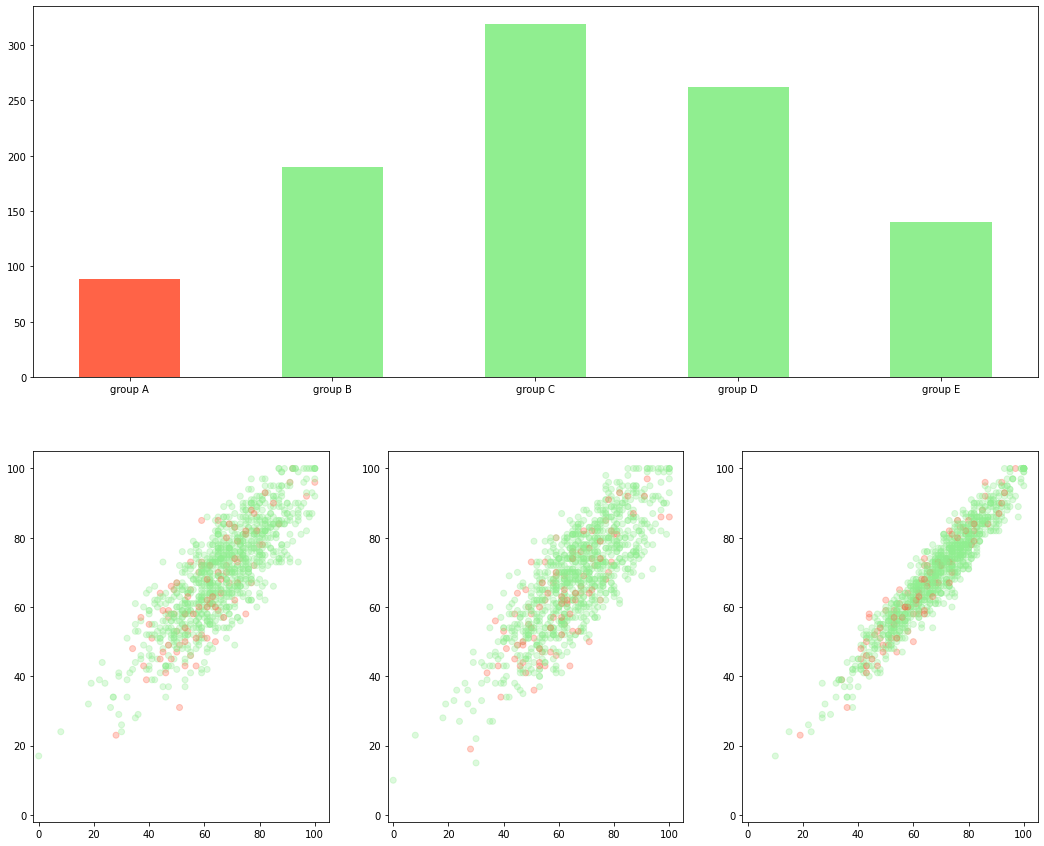

In [13]:
a_color, nota_color = 'tomato', 'lightgreen'

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.3)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.3)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.3)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()